<class 'numpy.float32'>
<class 'numpy.float32'>


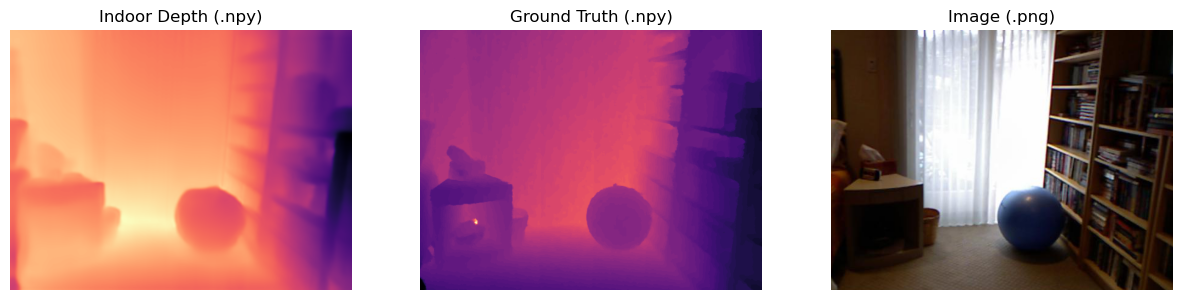

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

number = '000042'

# Load the .npy images
DATADIR = os.getcwd()
img1 = np.load(os.path.join(DATADIR, 'data\\train\\train\\sample_000042_rgb_depth.npy'))
# get rid of the first 2 dimensions
img1 = img1[0, 0, :, :]
print(type(img1[0, 0]))
img1 = (1.0-img1) * 10


img2 = np.load(os.path.join(DATADIR, 'data\\train\\train\\sample_000042_depth.npy'))
# Load the .png image
print(type(img2[0, 0]))

img3 = imread(os.path.join(DATADIR, 'data\\train\\train\\sample_000042_rgb.png'))

# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img1, cmap='magma')
axs[0].set_title('Indoor Depth (.npy)')
axs[0].axis('off')

axs[1].imshow(img2, cmap='magma')
axs[1].set_title('Ground Truth (.npy)')
axs[1].axis('off')

axs[2].imshow(img3)
axs[2].set_title('Image (.png)')
axs[2].axis('off')

plt.show()

In [36]:
def scale_invariant_rmse(pred, gt):
    """
    Computes the scale-invariant RMSE between two images.
    pred: predicted depth (img1)
    gt: ground truth depth (img2)
    """
    # Flatten arrays and mask out invalid values if needed
    pred = pred.flatten()
    gt = gt.flatten()
    mask = np.isfinite(pred) & np.isfinite(gt)
    pred = pred[mask]
    gt = gt[mask]
    
    print(np.min(pred), np.max(pred))
    print(np.min(gt), np.max(gt))
    # set invalid and negative values to 0
    
    pred[pred < 0] = 0
    gt[gt < 0] = 0

    log_diff = np.log(pred + 1e-8) - np.log(gt + 1e-8)
    n = len(log_diff)
    
    return np.sqrt((np.sum(log_diff ** 2) / n) - (np.sum(log_diff) ** 2) / (n ** 2))

sirmse = scale_invariant_rmse(img1, img2)
print("Scale-invariant RMSE:", sirmse)

0.65036595 8.355984
1.2941177 3.9607844
Scale-invariant RMSE: 0.24411198007890364
